In [ ]:
!sudo apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Computer Modern",
    "figure.dpi": 200,
})


In [ ]:
data_Al = np.genfromtxt('/content/drive/MyDrive/Al_KID2_81dBm__TmK120_avgpulse_ampphase.csv',skip_header=1,delimiter=',')
data_bTa = np.genfromtxt('/content/drive/MyDrive/bTa_KID3_96dBm__TmK20_avgpulse_ampphase.csv',skip_header=1,delimiter=',')

In [ ]:
# Shift to align data
phase_Al = data_Al[400:,2]
phase_bTa = data_bTa[:,2]

# Truncate longest array to match size of shortest
len_Al = len(phase_Al)
len_bTa = len(phase_bTa)
if len_Al > len_bTa:
  phase_Al = phase_Al[:len_bTa]
elif len_bTa > len_Al:
  phase_bTa = phase_bTa[:len_Al]

# normalise maximum to 1
phase_bTa /= np.max(phase_bTa)
phase_Al /= np.max(phase_Al)

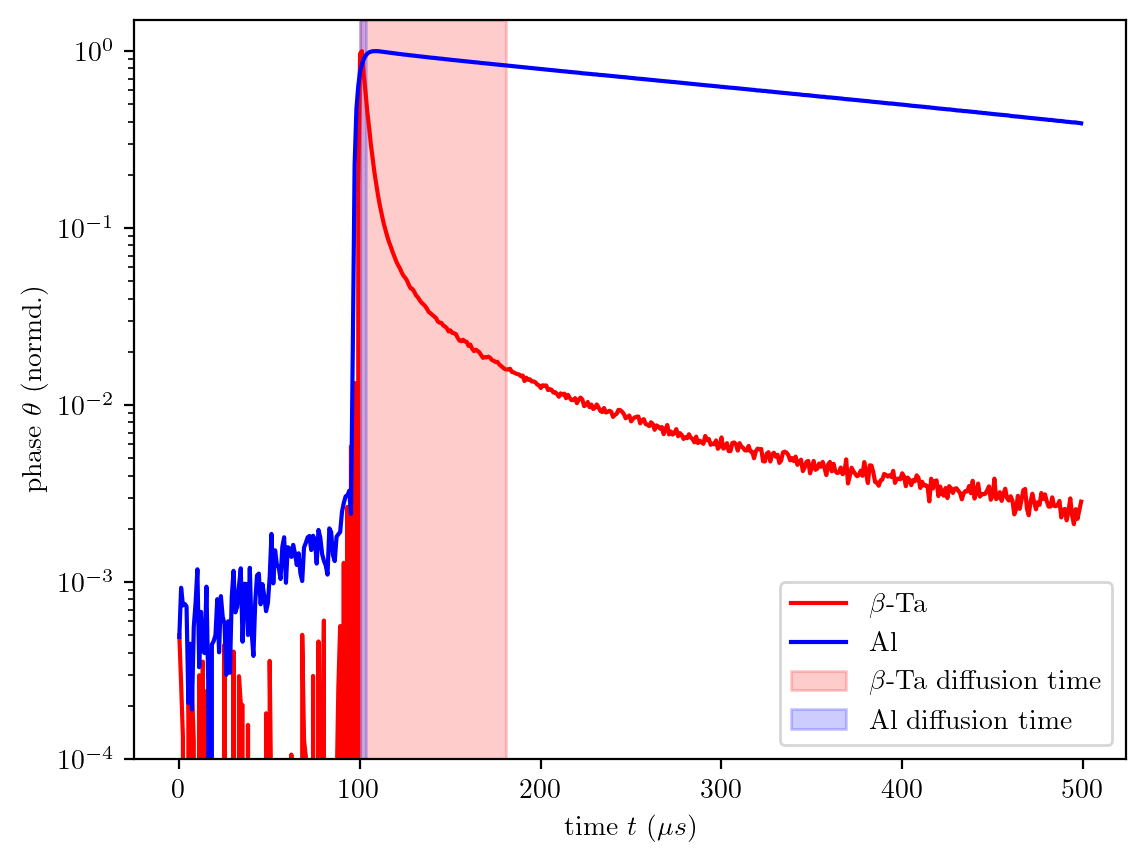

In [ ]:
plt.semilogy(phase_bTa,label=r'$\beta$-Ta',color='r')
plt.semilogy(phase_Al,label='Al',color='b')
plt.xlabel(r'time $t$ ($\mu s$)')
plt.ylabel(r'phase $\theta$ (normd.)')
plt.axvspan(100, 181, alpha=0.2, color='r',label=r'$\beta$-Ta diffusion time')
plt.axvspan(100, 103.2, alpha=0.2, color='b',label=r'Al diffusion time')
plt.ylim(0.0001,1.5)
plt.legend()

<ipython-input-68-65eca096918b>:1: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  E_axis = np.linspace(-0.05,3,100,dtype=np.complex)
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
<ipython-input-68-65eca096918b>:7: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidan

([], [])

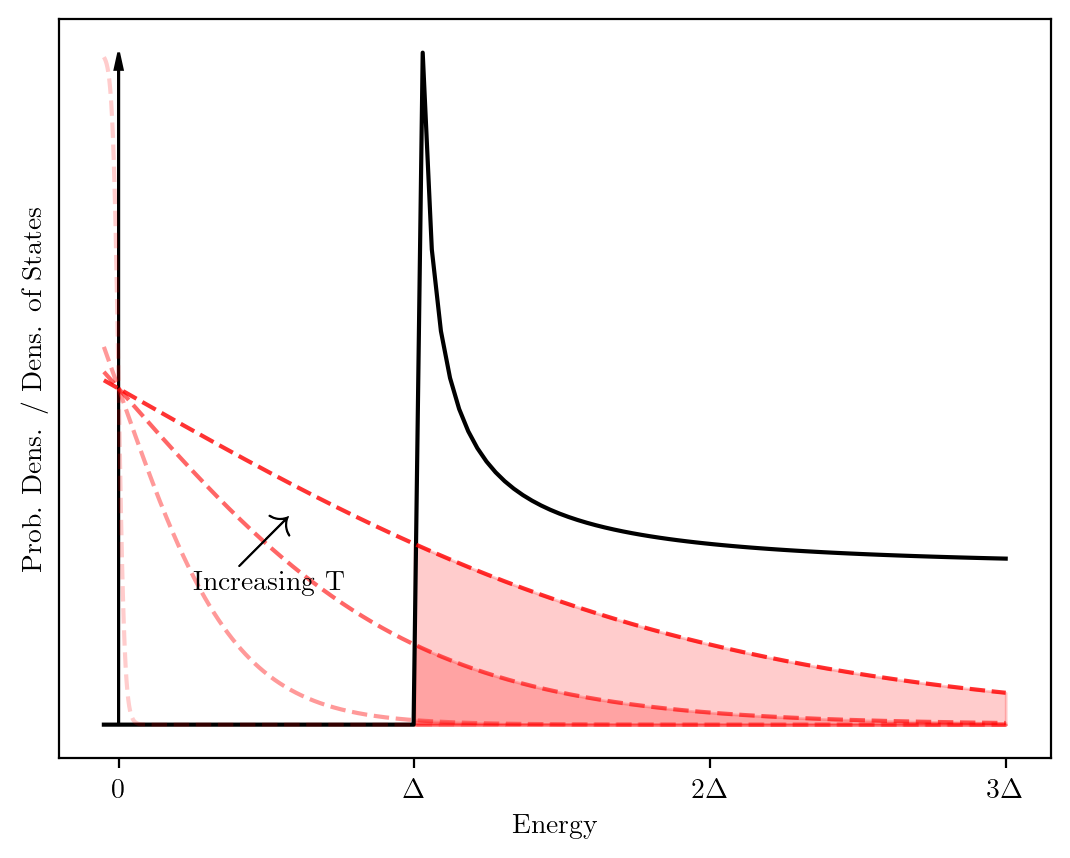

In [ ]:
E_axis = np.linspace(-0.05,3,100,dtype=np.complex)
Delta = 1
N_s = np.real(E_axis/np.sqrt(E_axis**2-Delta**2))
N_s /= np.max(N_s)
plt.plot(E_axis,N_s,color='black')
plt.arrow(0, 0, 0, 0.975, head_width=0.025, head_length=0.025, fc='black', ec='black')
E_fill=np.linspace(1,3,1000,dtype=np.complex)

E_axis = np.linspace(-0.05,3,1000,dtype=np.complex)

for i,T in enumerate([0.01,0.2,0.5,1]):
  f = 1/(np.exp((E_axis-0*Delta)/(T))+1)
  f_fill = 1/(np.exp((E_fill-0*Delta)/(T))+1)
  plt.fill_between(E_fill,f_fill,alpha=0.2,color='red')
  plt.plot(E_axis,f,linestyle='--',alpha=0.2+0.2*i,color='red')

plt.xticks(np.arange(4), [r'$0$',r'$\Delta$',r'$2\Delta$',r'$3\Delta$'])  # Set text labels.
plt.xlabel(r'Energy')
plt.ylabel(r'Prob. Dens. / Dens. of States')
plt.text(0.25,0.25,r'\huge$\nearrow$\normalsize\\Increasing T')
plt.yticks([])